In [1]:
#
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
#
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
df_HR = pd.read_csv("HR_comma_sep.csv")
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
#Correlation
corr = df_HR.corr(min_periods=1)
corr.sort(['left'],ascending=False,inplace=True)
corr.left

/home/han/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

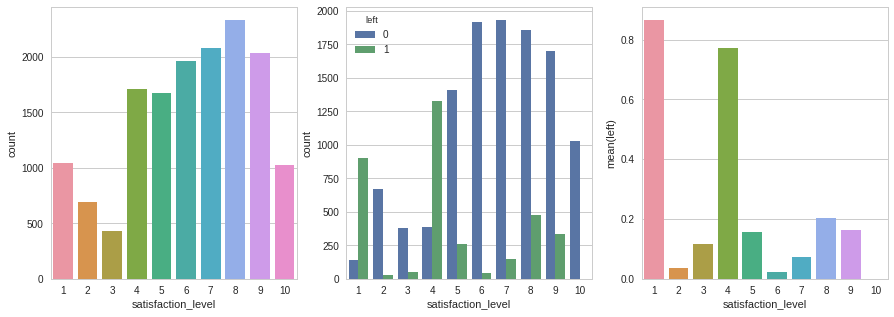

In [4]:
#satisfaction_level
df_HR.satisfaction_level = df_HR.satisfaction_level.apply(lambda s:(s+0.05)*10)
df_HR.satisfaction_level = df_HR.satisfaction_level.astype(int)

#
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='satisfaction_level', data=df_HR, ax=axis1)
sns.countplot(x='satisfaction_level', hue='left', data=df_HR,ax=axis2)

sat_perc = df_HR[['satisfaction_level','left']].groupby(['satisfaction_level'],as_index=False).mean()
sns.barplot(x='satisfaction_level',y='left',data=sat_perc,ax=axis3)

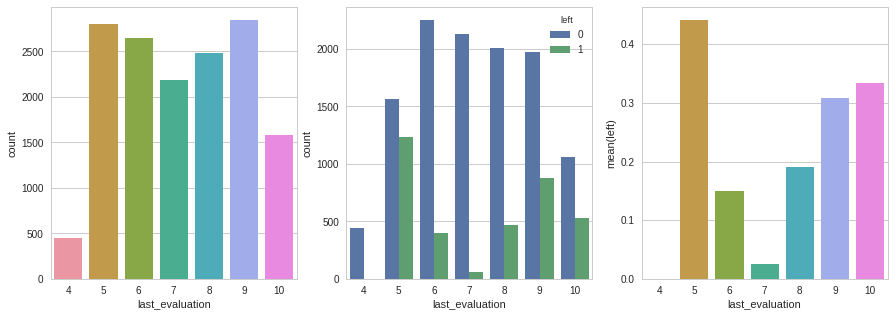

In [5]:
#
df_HR.last_evaluation = df_HR.last_evaluation.apply(lambda e:(e+0.05)*10)
df_HR.last_evaluation = df_HR.last_evaluation.astype(int)

#
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='last_evaluation', data=df_HR, ax=axis1)
sns.countplot(x='last_evaluation', hue='left', data=df_HR,ax=axis2)

sat_perc = df_HR[['last_evaluation','left']].groupby(['last_evaluation'],as_index=False).mean()
sns.barplot(x='last_evaluation',y='left',data=sat_perc,ax=axis3)

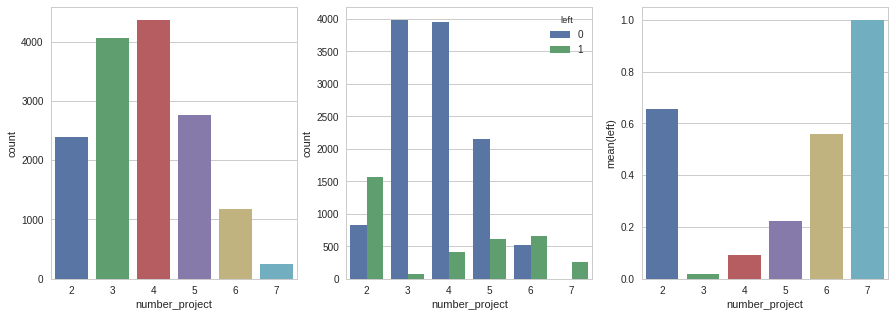

In [6]:
#
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='number_project', data=df_HR, ax=axis1)
sns.countplot(x='number_project', hue='left', data=df_HR,ax=axis2)

sat_perc = df_HR[['number_project','left']].groupby(['number_project'],as_index=False).mean()
sns.barplot(x='number_project',y='left',data=sat_perc,ax=axis3)

In [7]:
df_HR.average_montly_hours.describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

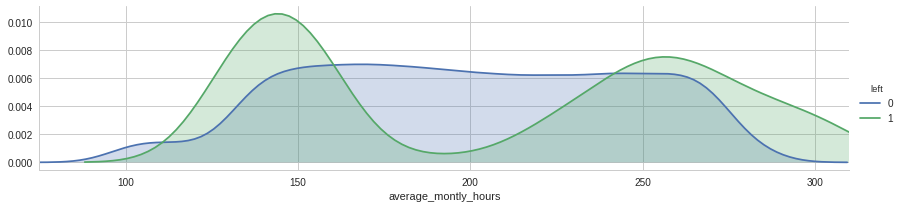

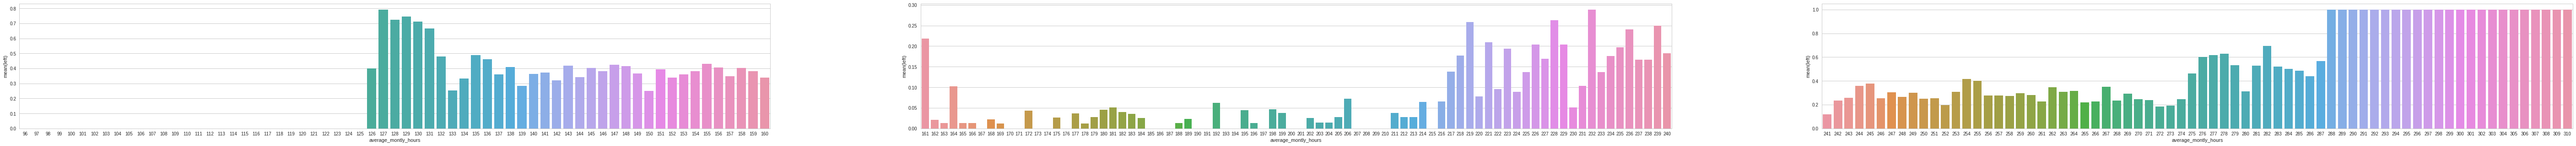

In [8]:
#
facet = sns.FacetGrid(df_HR, hue='left',aspect=4)
facet.map(sns.kdeplot,'average_montly_hours',shade=True)
facet.set(xlim=(75, df_HR.average_montly_hours.max()))
facet.add_legend()

#
low = df_HR[['average_montly_hours','left']][df_HR.average_montly_hours<=160]
medium = df_HR[['average_montly_hours','left']][(df_HR.average_montly_hours >160) & (df_HR.average_montly_hours <= 240)]
high = df_HR[['average_montly_hours','left']][df_HR.average_montly_hours>240]

#
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(100,5))
low_time = low.groupby(['average_montly_hours'],as_index=False).mean()
medium_time = medium.groupby(['average_montly_hours'],as_index=False).mean()
high_time = high.groupby(['average_montly_hours'],as_index=False).mean()
sns.barplot(x='average_montly_hours',y='left',data=low_time,ax=axis1)
sns.barplot(x='average_montly_hours',y='left',data=medium_time,ax=axis2)
sns.barplot(x='average_montly_hours',y='left',data=high_time,ax=axis3)

In [9]:
df_HR.time_spend_company.describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

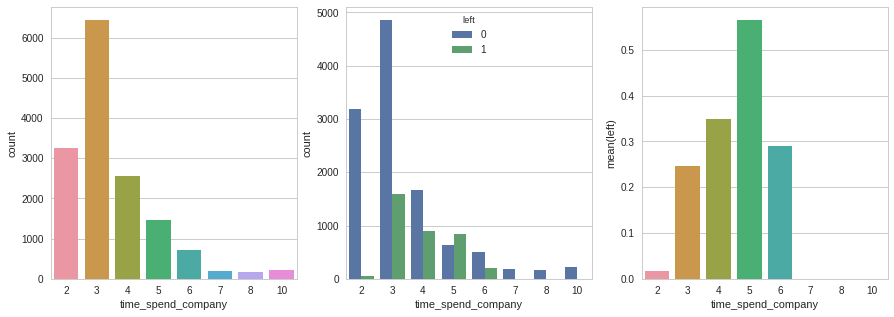

In [10]:
#
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='time_spend_company', data=df_HR, ax=axis1)
sns.countplot(x='time_spend_company', hue='left', data=df_HR,ax=axis2)

sat_perc = df_HR[['time_spend_company','left']].groupby(['time_spend_company'],as_index=False).mean()
sns.barplot(x='time_spend_company',y='left',data=sat_perc,ax=axis3)

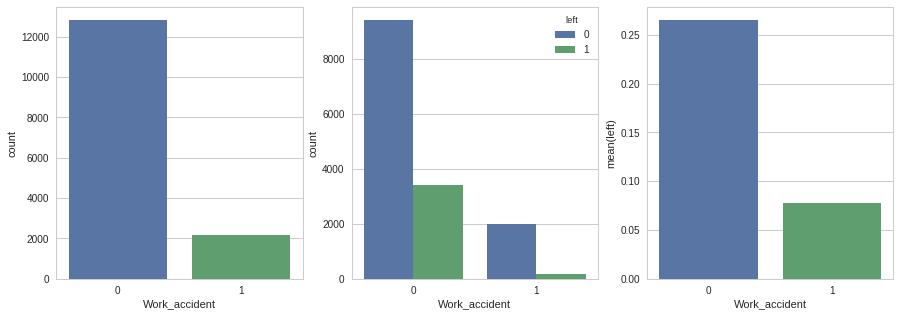

In [11]:
#Work_accident

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Work_accident', data=df_HR, ax=axis1)
sns.countplot(x='Work_accident', hue='left', data=df_HR,ax=axis2)

sat_perc = df_HR[['Work_accident','left']].groupby(['Work_accident'],as_index=False).mean()
sns.barplot(x='Work_accident',y='left',data=sat_perc,ax=axis3)

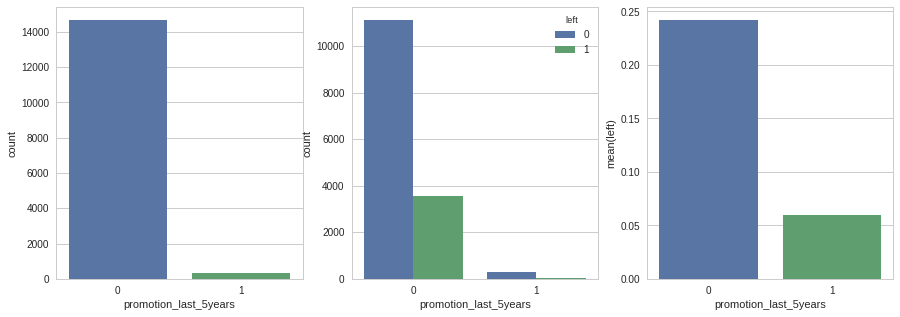

In [12]:
#promotion_last_5years

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='promotion_last_5years', data=df_HR, ax=axis1)
sns.countplot(x='promotion_last_5years', hue='left', data=df_HR,ax=axis2)

sat_perc = df_HR[['promotion_last_5years','left']].groupby(['promotion_last_5years'],as_index=False).mean()
sns.barplot(x='promotion_last_5years',y='left',data=sat_perc,ax=axis3)

In [13]:
df_HR.groupby('sales').size()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

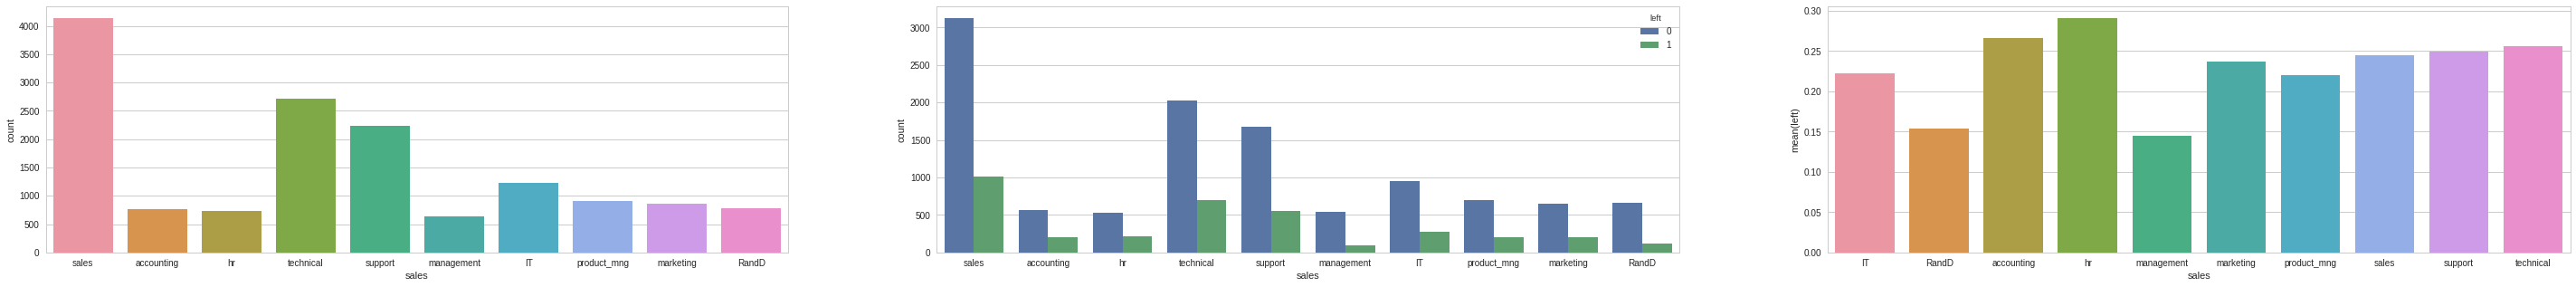

In [14]:
#sales

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(50,5))

sns.countplot(x='sales', data=df_HR, ax=axis1)
sns.countplot(x='sales', hue='left', data=df_HR,ax=axis2)

sat_perc = df_HR[['sales','left']].groupby(['sales'],as_index=False).mean()
sns.barplot(x='sales',y='left',data=sat_perc,ax=axis3)

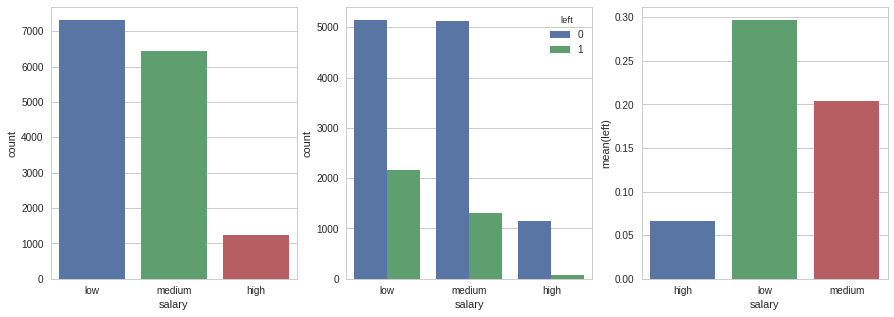

In [15]:
#salary

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='salary', data=df_HR, ax=axis1)
sns.countplot(x='salary', hue='left', data=df_HR,ax=axis2)

sat_perc = df_HR[['salary','left']].groupby(['salary'],as_index=False).mean()
sns.barplot(x='salary',y='left',data=sat_perc,ax=axis3)

In [16]:
#Creat dummies

#sales
sales_dummies = pd.get_dummies(df_HR.sales)
sales_dummies.columns = ['IT','RandD','accounting','hr','management',
                         'marketing','product_mng','saler','support',
                         'technical']
df_HR = df_HR.join(sales_dummies)
df_HR.drop(['sales'],axis=1,inplace=True)

#salary
salary_dummies = pd.get_dummies(df_HR.salary)
salary_dummies.columns = ['low','medium','high']
df_HR = df_HR.join(salary_dummies)
df_HR.drop(['salary'],axis=1,inplace=True)

In [17]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level       14999 non-null int64
last_evaluation          14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
IT                       14999 non-null uint8
RandD                    14999 non-null uint8
accounting               14999 non-null uint8
hr                       14999 non-null uint8
management               14999 non-null uint8
marketing                14999 non-null uint8
product_mng              14999 non-null uint8
saler                    14999 non-null uint8
support                  14999 non-null uint8
technical                14999 non-null uint8
low                      14999 non-null uint8
medium           

In [18]:
df_HR.drop('Work_accident',axis=1,inplace=True)
#df_HR.drop('satisfaction_level',axis=1,inplace=True)
#df_HR.drop('promotion_last_5years',axis=1,inplace=True)

In [19]:
# training
X_train = df_HR.drop('left',axis=1)
Y_train = df_HR.left


In [20]:
#
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [21]:
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print msg 

LR: 0.743903 (0.242711)


/home/han/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.748503 (0.221453)
KNN: 0.960666 (0.012905)
CART: 0.977733 (0.016614)
NB: 0.664988 (0.093983)
SVM: 0.968130 (0.023258)
RF: 0.989600 (0.014130)


In [22]:
"""
(average accurary of all feature)
LR: 0.749769 (0.239118)             
LDA: 0.750903 (0.222714)
KNN: 0.959466 (0.012845)
CART: 0.976000 (0.017303)
NB: 0.634187 (0.110145)
SVM: 0.968130 (0.023376)
RF: 0.988733 (0.016062)

(average accurary of drop word_accident)
LR: 0.743903 (0.242711)
LDA: 0.748503 (0.221453)
KNN: 0.960666 (0.012905)
CART: 0.978067 (0.016737)
NB: 0.664988 (0.093983)
SVM: 0.968130 (0.023258)
RF: 0.989467 (0.014972)

(average accurary of drop promotion_last_5years)
LR: 0.749503 (0.239142)
LDA: 0.750903 (0.222809)
KNN: 0.959199 (0.012366)
CART: 0.976667 (0.017249)
NB: 0.721120 (0.047696)
SVM: 0.968064 (0.023131)
RF: 0.988600 (0.015642)



(average accurary of drop word_accident and promotion_last_5years)
LR: 0.743236 (0.243839)
LDA: 0.749037 (0.221730)
KNN: 0.960399 (0.012471)
CART: 0.977200 (0.017683)
NB: 0.747652 (0.058035)
SVM: 0.968197 (0.023128)
RF: 0.989000 (0.015133)


"""

'\n(average accurary of all feature)\nLR: 0.749769 (0.239118)             \nLDA: 0.750903 (0.222714)\nKNN: 0.959466 (0.012845)\nCART: 0.976000 (0.017303)\nNB: 0.634187 (0.110145)\nSVM: 0.968130 (0.023376)\nRF: 0.988733 (0.016062)\n\n(average accurary of drop word_accident)\nLR: 0.743903 (0.242711)\nLDA: 0.748503 (0.221453)\nKNN: 0.960666 (0.012905)\nCART: 0.978067 (0.016737)\nNB: 0.664988 (0.093983)\nSVM: 0.968130 (0.023258)\nRF: 0.989467 (0.014972)\n\n(average accurary of drop promotion_last_5years)\nLR: 0.749503 (0.239142)\nLDA: 0.750903 (0.222809)\nKNN: 0.959199 (0.012366)\nCART: 0.976667 (0.017249)\nNB: 0.721120 (0.047696)\nSVM: 0.968064 (0.023131)\nRF: 0.988600 (0.015642)\n\n\n\n(average accurary of drop word_accident and promotion_last_5years)\nLR: 0.743236 (0.243839)\nLDA: 0.749037 (0.221730)\nKNN: 0.960399 (0.012471)\nCART: 0.977200 (0.017683)\nNB: 0.747652 (0.058035)\nSVM: 0.968197 (0.023128)\nRF: 0.989000 (0.015133)\n\n\n'

In [23]:
# Split-out validation dataset
validation_size = 0.20
X, X_validation, Y, Y_validation =model_selection.train_test_split(X_train,
                                                                   Y_train,
                                 test_size=validation_size,random_state=seed)

In [24]:
#LR
#lr =LogisticRegression()
#lr.fit(X, Y)
#lr_pred = lr.predict(X_validation)

#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)
knn_pred = knn.predict(X_validation)

#DecisionTree
dt =DecisionTreeClassifier()
dt.fit(X, Y)
dt_pred = dt.predict(X_validation)

#SVM
svm =SVC()
svm.fit(X, Y)
svm_pred = svm.predict(X_validation)

#RandomForest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, Y)
rf_pred = rf.predict(X_validation)


In [26]:
#Prediction
Prediction = pd.DataFrame(index=X_validation.index , columns=['KNN','DT','SVM','RF'])
Prediction.KNN=knn_pred
Prediction.DT=dt_pred
Prediction.SVM=svm_pred
Prediction.RF=rf_pred

#counting
Prediction['left']=np.nan
for i in Prediction.index :
    t=0
    f=0

    #KNN
    if Prediction.loc[i,'KNN'] == 1 :
        t+=1
    elif Prediction.loc[i,'KNN'] == 0 :
        f+=1
    #DT
    if Prediction.loc[i,'DT'] == 1 :
        t+=1
    elif Prediction.loc[i,'DT'] == 0 :
        f+=1
    #SVM
    if Prediction.loc[i,'SVM'] == 1 :
        t+=1
    elif Prediction.loc[i,'SVM'] == 0 :
        f+=1
    #RF
    if Prediction.loc[i,'RF'] == 1 :
        t+=1
    elif Prediction.loc[i,'RF'] == 0 :
        f+=1
        
    #compare
    if t>f :
        Prediction.loc[i,'left'] = 1
    elif f>t :
        Prediction.loc[i,'left'] = 0
    else :
        Prediction.loc[i,'left'] = Prediction.loc[i,'RF']

Prediction.left=Prediction.left.astype(int)

In [27]:
#
Final=Prediction['left']
s = Final.values

#print('LR:')
#print(accuracy_score(Y_validation,lr_pred))
print('KNN:')
print(accuracy_score(Y_validation,knn_pred))
print('DT:')
print(accuracy_score(Y_validation,dt_pred))
print('SVM:')
print(accuracy_score(Y_validation,svm_pred))
print('RF:')
print(accuracy_score(Y_validation,rf_pred))
print('Most:')
print(accuracy_score(Y_validation,s))

KNN:
0.958
DT:
0.975333333333
SVM:
0.968333333333
RF:
0.985333333333
Most:
0.987333333333


In [ ]:
"""
(all)
KNN:
0.957666666667
DT:
0.975333333333
SVM:
0.968666666667
RF:
0.984666666667
Most:
0.987

(drop)

"""